In [1]:
import torch
import torch.nn as nn
import numpy as np
from torch.nn import Linear
import matplotlib.pyplot as plt


Text(0, 0.5, 'y')

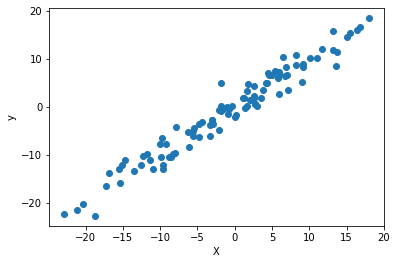

In [2]:
X = torch.randn(100,1)*10
y = X + 2*torch.randn(100,1)
plt.plot(X.numpy(), y.numpy(),'o')
plt.xlabel('X')
plt.ylabel('y')

In [3]:
class LR(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        pred = self.linear(x)
        return pred

In [4]:
torch.manual_seed(1)
model = LR(1,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [5]:
[w,b] = model.parameters()
def get_params():
    return (w[0][0].item(),b[0].item())

In [6]:
def plot_fit(title):
    plt.title(title)
    w1,b1 = get_params()
    x1 = np.array([-30,30])
    y1 = w1*x1+b1
    plt.plot(x1,y1,'r')
    plt.scatter(X,y)
    plt.show()

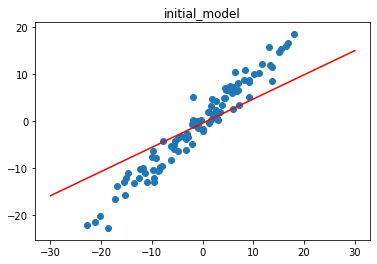

In [7]:
plot_fit('initial_model')

In [8]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [9]:
epochs = 100
losses = []
for i in range(epochs):
    y_pred = model.forward(X)
    loss = criterion(y_pred, y )
    print('Epoch:',i,'Loss:',loss.item())
    
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 Loss: 22.055477142333984
Epoch: 1 Loss: 14.432424545288086
Epoch: 2 Loss: 10.046392440795898
Epoch: 3 Loss: 7.521266460418701
Epoch: 4 Loss: 6.066009044647217
Epoch: 5 Loss: 5.225895404815674
Epoch: 6 Loss: 4.739529132843018
Epoch: 7 Loss: 4.456644058227539
Epoch: 8 Loss: 4.290855884552002
Epoch: 9 Loss: 4.192503929138184
Epoch: 10 Loss: 4.133037090301514
Epoch: 11 Loss: 4.096037864685059
Epoch: 12 Loss: 4.072064399719238
Epoch: 13 Loss: 4.0556840896606445
Epoch: 14 Loss: 4.043771743774414
Epoch: 15 Loss: 4.034525394439697
Epoch: 16 Loss: 4.026905059814453
Epoch: 17 Loss: 4.02031135559082
Epoch: 18 Loss: 4.0143938064575195
Epoch: 19 Loss: 4.00894832611084
Epoch: 20 Loss: 4.003855228424072
Epoch: 21 Loss: 3.9990408420562744
Epoch: 22 Loss: 3.9944615364074707
Epoch: 23 Loss: 3.9900879859924316
Epoch: 24 Loss: 3.9859018325805664
Epoch: 25 Loss: 3.98188853263855
Epoch: 26 Loss: 3.9780378341674805
Epoch: 27 Loss: 3.9743411540985107
Epoch: 28 Loss: 3.9707913398742676
Epoch: 29 Loss:

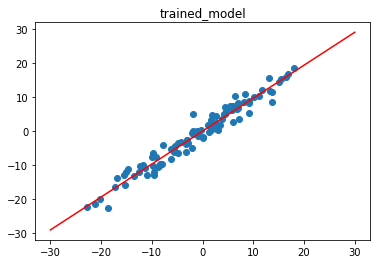

In [10]:
plot_fit('trained_model')